   symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsep

<ipython-input-79-5f617d3a0edc>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bore"]=df2["bore"].astype("float",copy=True)               #changing the type of column bore to int so to perform certain operations
<ipython-input-79-5f617d3a0edc>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bore"]=0.5+df2["bore"]


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,hp_binned,fuel=type diesel,fuel-type gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,low,0,1
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,low,0,1
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,low,0,1


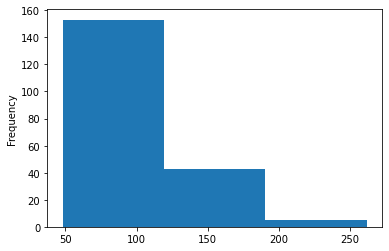

In [79]:
#Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis

#Steps for working with missing data:
#1)Identify missing data
#2)deal with missing data
#3)correct data format

#How to deal with missing data?
#for continuous data use mean()
#for categorical values use df.iloc[:,column number].mode()[0]


#drop data
#a. drop the whole row
#b. drop the whole column
#replace data
#a. replace it by mean
#b. replace it by frequency
#c. replace it based on other functions

#data normalisation-use max(),min(),mean(),std(),eg. avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
#1 simple feature=>   x(new)=x(old)/x(max)            
#2 min-max scaler=>   x(new)=x(old)-x(min)/x(max)-x(min)
#3 standardScaler,z-score       =>   (x(old)-u) / sigma




from pandas import *
from numpy import *

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df=read_csv(url,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df.replace("?",NaN,inplace=True)                   # replace("",variable or string)
df.dropna(subset=["price"],axis=0,inplace=True)    #dropna (as axis=0,subset=list of columnheaders) axis=0 will drop the row. axis1 will drop entire column
df.head(20)
df.to_csv("automobile.csv",index=False)            #saving file to_csv
df.dtypes
df.describe()                                      #statistical summary of each column
df.describe(include="all")




df2=df[["make","aspiration","bore"]]               #making another frame using existing one
df2
df2.info
#print(df2["bore"].dtypes)                         #checking type of column bore
df2["bore"]=df2["bore"].astype("float",copy=True)  #changing the type of column bore to int so to perform certain operations
df2["bore"]=0.5+df2["bore"]
df2





#missing values
missing_data = df.isnull()
print(missing_data.head(5))
print("")

#counting missing 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())          #here it prints true and false counts cuz missing_data is a df of false and trues..
    print("") 
#or use this for counting missing 
"""for i in df.columns.tolist():
    print(i)
    print(df[i].isnull().sum())
"""

#value counts and idxmax()    
print(df2["bore"].value_counts())    
print(df2["bore"].value_counts().idxmax())    

##df.dropna(subset=["horsepower"],axis=0,inplace=True)    #dropping nan values if u like or replace with mean value
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(NaN,avg_horsepower,inplace=True)
df["horsepower"]=df["horsepower"].astype("int") #converting float to int for graph/plotting




#binning
#Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis

from matplotlib import *
bins=linspace(min(df["horsepower"]),max(df["horsepower"]),4)  #for n equal bins we use n+1 dividers.therfore 4 dividers.
bins    #it is an array of our bin ranges.
group_names=["low","medium","high"]
df["hp_binned"]=cut(df["horsepower"],bins,labels=group_names,include_lowest=True)   #new column=cut(column,bins,labels,include_lowest)
df[["horsepower","hp_binned"]].head(10)
y=df["hp_binned"].value_counts()
##pyplot.bar(group_names,df["hp_binned"].value_counts())

#binning using histogram
df["horsepower"].plot(kind="hist",bins=3)





#Indicator variable (or dummy variable)
#What is an indicator variable?
#An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
#Why we use indicator variables?
#So we can use categorical variables for regression analysis.
df["fuel-type"].tail()
dummy=get_dummies(df["fuel-type"])   #it creates a table of column headers as the values inside the column fuel-type and its values are 1,0
dummy.head()
dummy.rename(columns={'gas':'fuel-type gas','diesel':'fuel=type diesel'},inplace=True)
df=concat([df,dummy],axis=1)   #merges the two dataframes along columns
df.drop("fuel-type",axis=1,inplace=True)  #drops the whole fueltype column
df.head()

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


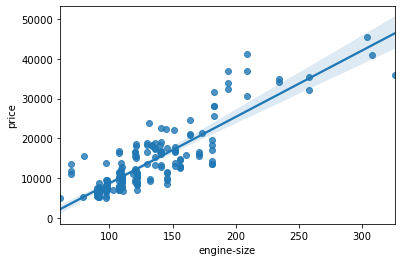

Unique values of engine loacations are --- ['front' 'rear']


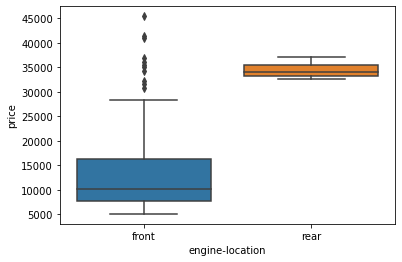

              total counts
Drive-wheels              
fwd                    118
rwd                     75
4wd                      8
   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222
                   price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000 

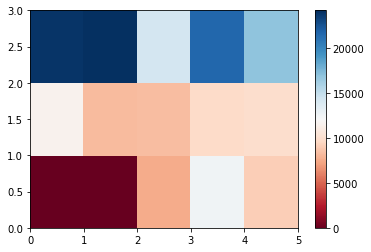

In [54]:
###
####   WEEK 3

#      What are the main characteristics which have the most impact on the car price?

##PART 1
#importing
from pandas import *
from numpy import *
from scipy import stats
path=path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=read_csv(path)

#####################################################################################################################
#PART 2 
#Analyzing Individual Feature Patterns using Visualization

from matplotlib.pyplot import *
import seaborn as sns

#A) Correlation and scatter plot for continuos variable

print(df[["engine-size","price"]].corr())
ax=sns.regplot(x="engine-size",y="price",data=df)
show(ax)

#B) Box plot for categorical variables
print("Unique values of engine loacations are ---",df["engine-location"].unique())
ax2=sns.boxplot(x="engine-location",y="price",data=df)
show(ax2)

#####################################################################################################################

#PART 3
#Descriptive Statistical Analysis
df.describe()
df.describe(include="all")
df.describe(include="object")

#value counts
df_dw=df["drive-wheels"].value_counts().to_frame()

df_dw.index.name="Drive-wheels"
df_dw.rename(columns={"drive-wheels":"total counts"},inplace=True)
print(df_dw)

#####################################################################################################################

#PART 4
#BASICS OF GROUPING
#a)groupby
df["drive-wheels"].unique()
dfgroup=df[["drive-wheels","price","body-style"]].groupby(["drive-wheels","body-style"],as_index=False).mean()
print(dfgroup)
#b)pivot table
dfpivot=dfgroup.pivot(index="drive-wheels",columns="body-style") #converting from earlier grouped to pivot table
dfpivot=dfpivot.fillna(0)                                        #updating table by removing na values and replacing it with 0
print(dfpivot)
#c)heatmap
pcolor(dfpivot,cmap="RdBu")
colorbar()

#PART5 

#CORRELATION:Correlation: a measure of the extent of interdependence between variables.

#PEARSON COEFFICIENT: The Pearson Correlation measures the linear dependence between two variables X and Y.
#The resulting coefficient is a value between -1 and 1 inclusive, where:
#1: Total positive linear correlation.
#0: No linear correlation, the two variables most likely do not affect each other.
#-1: Total negative linear correlation.

df.corr()    #df.corr()["price"].sort_values() will give corr of all columns with respect to price


#P-value:
#What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
#p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
#the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
#the p-value is  <  0.1: there is weak evidence that the correlation is significant.
#the p-value is  >  0.1: there is no evidence that the correlation is significant.

pc,pv=stats.pearsonr(df["wheel-base"],df["price"])
print(pc,pv)


#PART6
#ANOVA: Analysis of Variance
#The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups.
#ANOVA returns two parameters:
#F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
#P-value: P-value tells how statistically significant is our calculated score value.
#If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
dfgroup2=df[["drive-wheels","price"]].groupby(["drive-wheels"])
print(dfgroup2.head())
print(dfgroup2.get_group("4wd")["price"])

f,p=stats.f_oneway(dfgroup2.get_group('fwd')['price'], dfgroup2.get_group('rwd')['price'], dfgroup2.get_group('4wd')['price'])  
print(f,p)
f,p=stats.f_oneway(dfgroup2.get_group('fwd')['price'], dfgroup2.get_group('rwd')['price'])  
print(f,p)
f,p=stats.f_oneway(dfgroup2.get_group('fwd')['price'], dfgroup2.get_group('4wd')['price'])  
print(f,p)
f,p=stats.f_oneway(dfgroup2.get_group('rwd')['price'], dfgroup2.get_group('4wd')['price'])  
print(f,p)

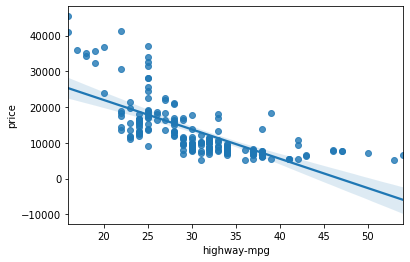

C:\Users\anime\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


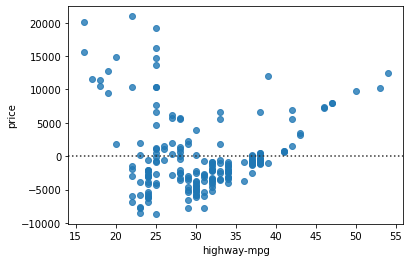

C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


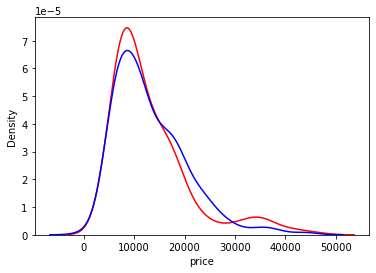

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


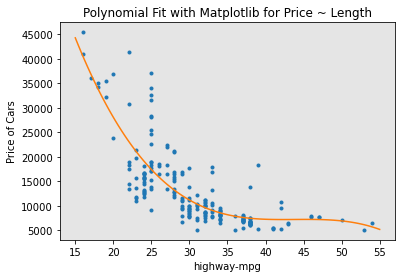

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


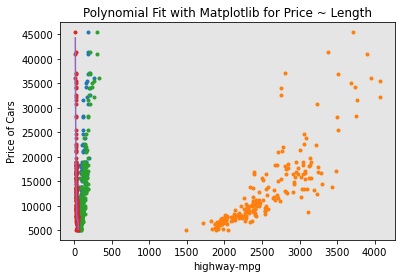

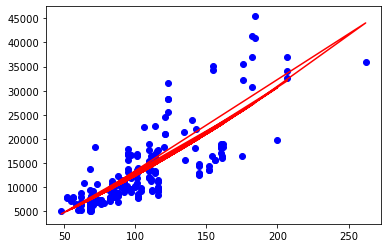

[[ 0.20375448 -0.01485764  0.07538912 -0.54228772]
 [ 0.20375448 -0.01485764  0.07538912 -0.54228772]
 [ 1.3574159   0.51807951  0.60623417 -0.689386  ]
 [-0.03770954 -0.42376578 -0.43132661 -0.10099285]
 [ 0.31107182  0.52001746  0.22016504 -1.27777915]]
   horsepower
0       111.0
1       111.0
2       154.0
3       102.0
4       115.0
The R-square is:  0.4965911884339175
The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639895
The R-square is:  0.8093562806577457
11980366.87072649
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05
The R-square value is:  0.674194666390652


20474146.426361218

In [1]:
####WEEK 4


import numpy as np
import matplotlib.pyplot as plt
from pandas import *
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = read_csv(path)
df.head()

#slr
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
#lm.coef_
yhat=lm.predict(X)
yhat[0:5]

#mlr
lm1 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1.fit(Z,Y)
lm1.coef_
yhat1=lm1.predict(Z)
yhat1[0:10]

#model eva via viz.
#slr viz
import seaborn as sns
ax=sns.regplot(x="highway-mpg",y="price",data=df)
plt.show(ax)
ax1=sns.residplot(df["highway-mpg"],df["price"])
plt.show(ax1)
#mlr viz
ax2a=sns.distplot(df["price"],hist=False,label="Actutual plot",color="r")
#plt.show(ax2a)
ax2b=sns.distplot(yhat1,hist=False,label="Predicted plot",color="b",ax=ax2a)
plt.show(ax2b)

#ployregression (#check data analysis poly regression file .)

 #transform from(200,4) to (200,15) (samples/rows,no of features)
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.shape
Z_pr=pr.fit_transform(Z)
Z_pr.shape

 #fit and plot using function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898)) 
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)  #model
print(p)
PlotPolly(p, x, y, 'highway-mpg')

#check data analysis poly regression file .







#PREPROCESSING/NORMALISATION: STANDARD SCALER

from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #fit
x_scaled=s.transform(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #transform
print(x_scaled[0:5]) #scaled
print(x.head()) #original



#PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z = Z.astype(float)  #TO AVOID CONVERSION WARNINGS
#examples
pipe.fit(Z,y) #fitting- normalise+transform+fitting
ypipe=pipe.predict(Z) #yhat- normalise+transform+yhat




# Measures for In-Sample Evaluation
from sklearn.metrics import mean_squared_error
X = df[['highway-mpg']]
Y = df['price']
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm = LinearRegression()

#1 SLR
# fit the model 
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
#Let's calculate the MSE:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

#2 MLR

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
# MSE
Y_predict_multifit = lm.predict(Z)
print(mean_squared_error(df['price'], Y_predict_multifit))

#3 PR
from sklearn.metrics import r2_score
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
mean_squared_error(df['price'], p(x))

In [2]:
%%capture
! pip install ipywidgets

number of test samples : 21
number of training samples: 180
1 0.3635875575078824 0.6619724197515103
2 0.7139364665406973
rcross= [0.7746232  0.51716687 0.74785353 0.04839605]
The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029
neg_mse= [20254142.84026704 43745493.2650517  12539630.34014931 17561927.72247591]
yhat= [14141.63807508 14141.63807508 20814.29423473 12745.03562306
 14762.35027598]


C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


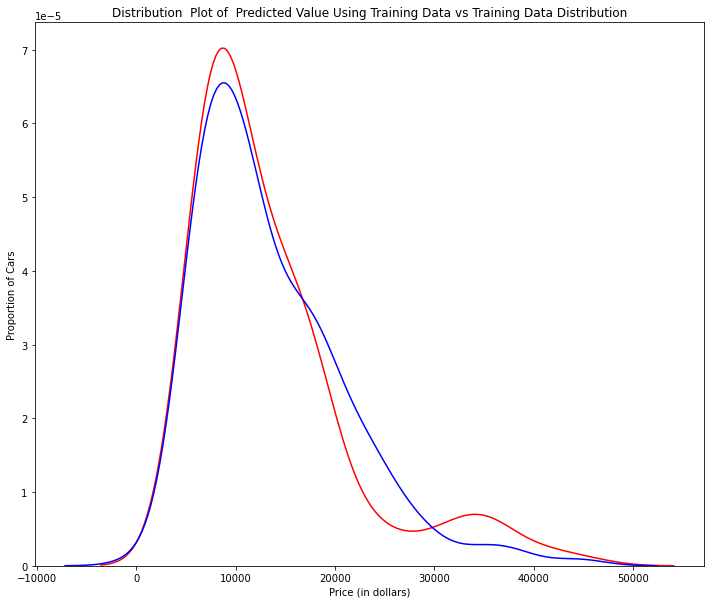

C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anime\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


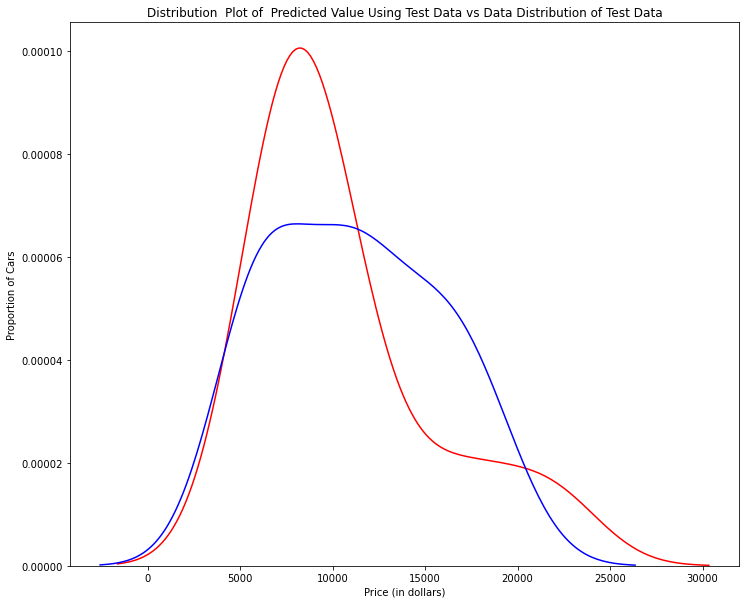

shape of x_train_pr is  (110, 1)
shape of x_train is  (110, 6)
Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


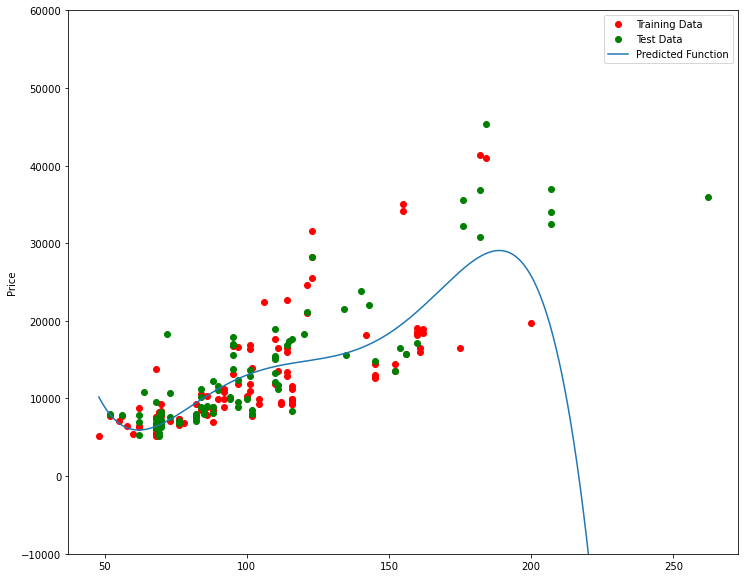

r^2 train data 0.5567716902635091
r^2 test data -29.871418859187518


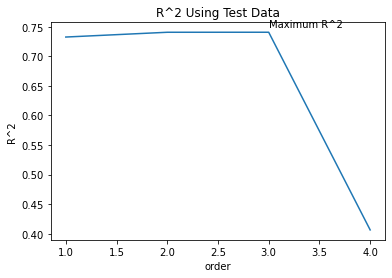

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

predicted: [ 6472.05406775  9537.15585237 21078.08955884] 
true: 
 [ 6295. 10698. 13860.] score: 0.5418576440207269
Ridge(alpha=10000)
{'mean_fit_time': array([0.00274241, 0.00199473, 0.00199437, 0.00249338, 0.00199473,
       0.00174588, 0.00174499, 0.00149602, 0.00174552]), 'std_fit_time': array([4.32431250e-04, 5.19621246e-07, 1.68587394e-07, 4.98772237e-04,
       3.57627869e-07, 4.31639319e-04, 4.32774874e-04, 4.97877919e-04,
       4.32121273e-04]), 'mean_score_time': array([0.00149578, 0.0014962 , 0.00199497, 0.00299191, 0.0009973 ,
       0.00124639, 0.00124663, 0.00124693, 0.00124669]), 'std_score_time': array([4.98712326e-04, 4.98533320e-04, 5.46285593e-07, 2.33878591e-03,
       5.84003864e-07, 4.31983753e-04, 4.31983424e-04, 4.31674170e-04,
       4.32499616e-04]), 'param_alpha': masked_array(data=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',

NameError: name 'mean' is not defined

In [27]:
#WEEK 5
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

df.to_csv('module_5_auto.csv')

df=df._get_numeric_data()
df.head()

#FUNCTIONS FOR PLOTTING
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    
    
    
    
#Part 1: Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_data = df['price']
x_data=df.drop('price',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['horsepower']], y_train)  #We fit the model using the feature "horsepower":
oo=lre.score(x_test[['horsepower']], y_test)  #Let's calculate the R^2 on the test data:
ooo=lre.score(x_train[['horsepower']], y_train) ##Let's calculate the R^2 on the train data:
print("1",oo,ooo)

#R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
oo=lre.score(x_test1[['horsepower']],y_test1)
print("2",oo)






#CROSS_VAL_SCORE FOR R^2,MSE AND PREDICT(YHAT).
#Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. 
#Let's go over several methods that you can use for cross-validation.

 #R^2
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) #BY DEFAULT CROSS_VAL_SCORE GIVES SCORE OF R^2. SCORING="neg_mean_squared_error" will give mse.
print("rcross=",Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

 #mse
mse =-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4,scoring="neg_mean_squared_error")
print("neg_mse=",mse)

 #PREDICT(YHAT)
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
print("yhat=",yhat[0:5])







#Part 2: Overfitting, Underfitting and Model Selection
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
#Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train) #FIT
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #PREDICT TRAIN DATA ,CHECK WITH Y_TRAIN[0:5]
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #PREDiCT TEST DATA,CHECK WITH Y_TEST[0:5]

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
plt.show(DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)) #calling function distributionplot
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
plt.show(DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title))

#pr:Overfitting Overfitting occurs when the model fits the noise, but not the underlying process.Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship.
#Let's create a degree 5 polynomial model.
#Let's use 55 percent of the data for training and the rest for testing.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])

print("shape of x_train_pr is ",x_train[['horsepower']].shape) #(110,1)
print("shape of x_train is ",x_train_pr.shape) #(110,6)

x_test_pr = pr.fit_transform(x_test[['horsepower']])
lm = LinearRegression()
lm.fit(x_train_pr, y_train)
yhat = lm.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, lm,pr) #calling pollyplot funtion

print("r^2 train data",lm.score(x_train_pr, y_train))
print("r^2 test data",lm.score(x_test_pr, y_test)) #negative r^2 is sign of overfitting

#Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

c=plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 
plt.show(c) #We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

#The following function will be used in the next section.
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))






####RIDGE REGRESSION
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

rm=Ridge(alpha=10) #changing values of alpha will result in different 
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


rm.fit(x_train_pr,y_train)
yhat=rm.predict(x_test_pr)
print("predicted:",yhat[0:3],"\ntrue:","\n",y_test[0:3].values,"score:",rm.score(x_test_pr,y_test))
#check difference in score after changing alpha.




#####GRID SEARCH
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #add normalize=[True,False] for standardization results.
RR=Ridge()

Grid1 = GridSearchCV(RR, parameters1,cv=4) #OBJECT #In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data) #FIT

BestRR=Grid1.best_estimator_ #BEST ALPHA
print(BestRR)
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test) #R^2 corresponding to BestRR

scores=Grid1.cv_results_ 
print(scores)
print("scores are=",scores["mean_test_score"]) #All R^2 values for all alpha

print("price is",df[["price"]].mean(),'mean is',mean(df[["price"]]))